# 1. 데이터, 모듈 불러오기 및 KNN 피팅 방법

In [1]:
from sklearn import neighbors, datasets

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [3]:
%matplotlib inline

In [4]:
iris = datasets.load_iris()

X = iris.data[:, :2]
y = iris.target

In [5]:
# 모델 구축
clf = neighbors.KNeighborsClassifier(n_neighbors=5)
clf.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [6]:
y_pred = clf.predict(X)

In [7]:
from sklearn.metrics import confusion_matrix

In [8]:
confusion_matrix(y, y_pred)

array([[49,  1,  0],
       [ 0, 38, 12],
       [ 0, 12, 38]], dtype=int64)

# 2. Cross Validation을 활용한 최적의 k 찾기

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
# CV 진행
k_range = range(1, 100)
k_scores = []

for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_n eighbors=k)
    scores = cross_val_score(knn, X, y, cv = 10, scoring='accuracy')
    k_scores.append(scores.mean())

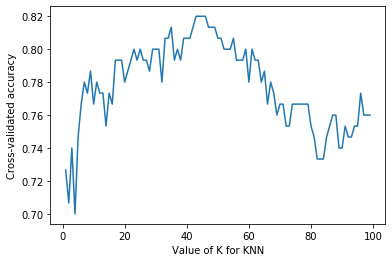

In [13]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-validated accuracy')
plt.show()

# 3. Weight를 준 KNN

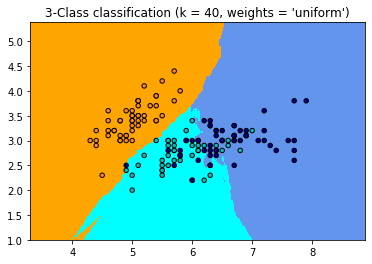

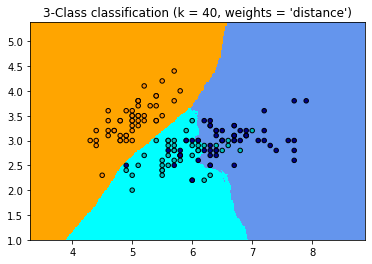

In [15]:
n_neighbors = 40

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for weights in ['uniform', 'distance']:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X, y)

    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Class classification (k = %i, weights = '%s')"
              % (n_neighbors, weights))

plt.show()